<a href="https://colab.research.google.com/github/linarahmatin/PCVK25_3F_30/blob/main/Week9_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama  : Sesy Tana Lina Rahmatin
##Kelas : TI 3F
##Nim   : 2341720029

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pytesseract

In [4]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

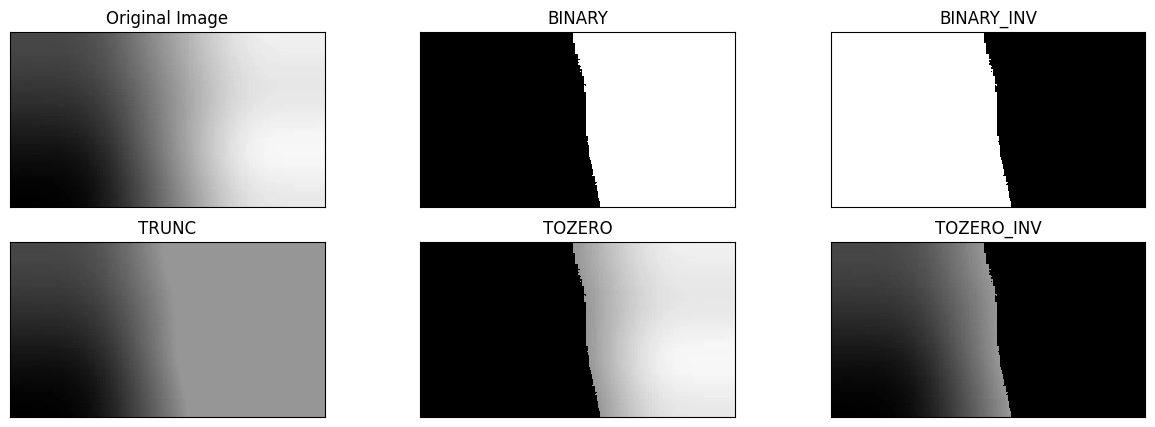

In [5]:
filename = ('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/gradient.jpg')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 150 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255 #tanpa library
thresh1[img<=thresh] = 0
#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1 #tanpa library
#3. Threshold Truncate
thresh3[img>thresh] = thresh #tanpa library
#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library
#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

/tmp/ipython-input-327067819.py:18: RuntimeWarning: invalid value encountered in divide
  mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)


157


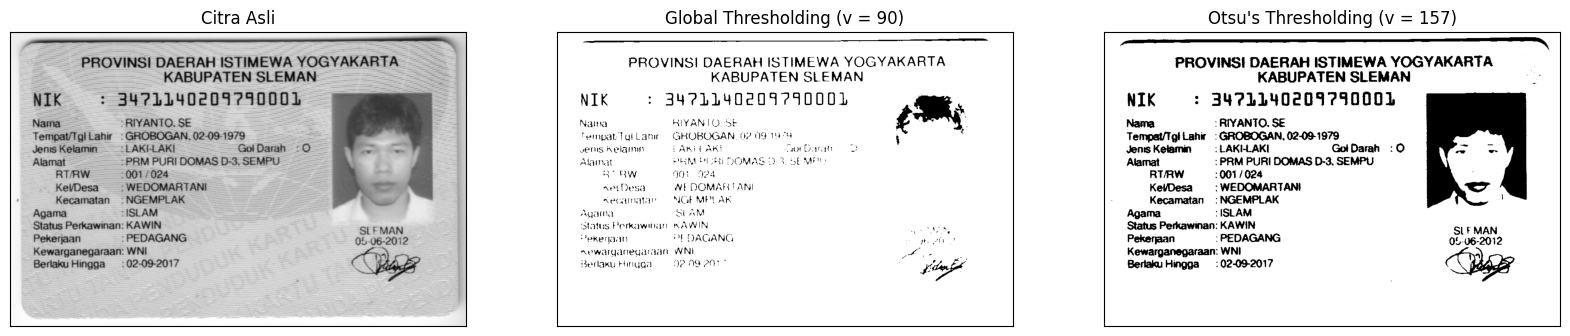

In [6]:
filename = ('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/ktp.png')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)


def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2
        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(blur)

x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv.threshold(blur,90,255,cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))
for i in range(len(citra3)):
    plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

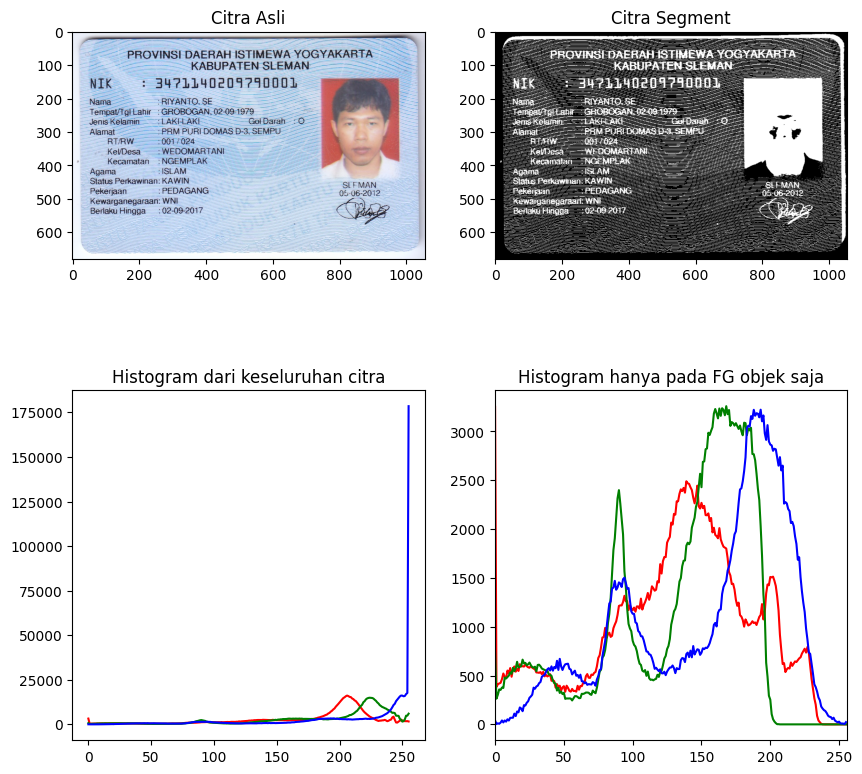

In [7]:
filename = ('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x78ae612b5940>)

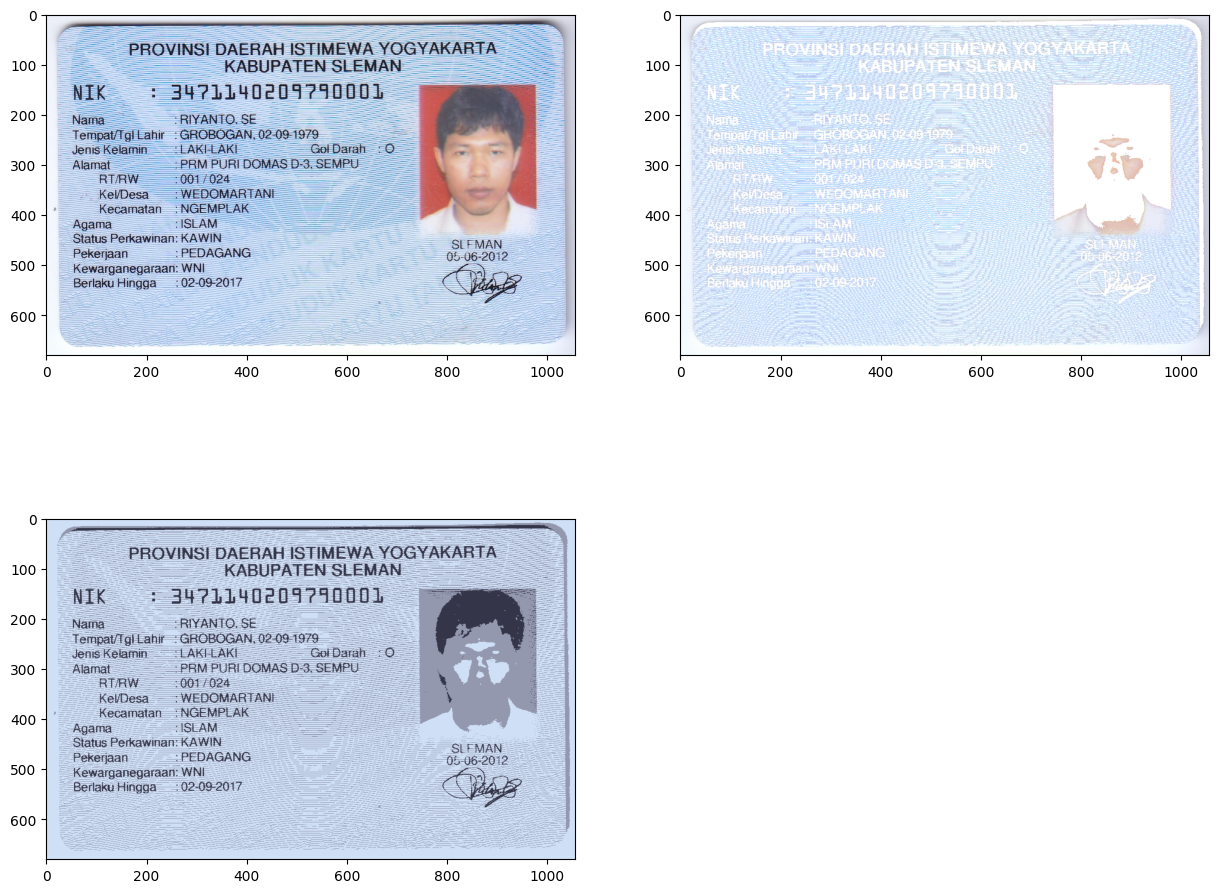

In [8]:
filename = ('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan,
sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak
pergeseran posisi antara interasi sekarang

Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita
akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi
sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10,
cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)
plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

In [9]:
!pip install pytesseract

In [10]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [12]:
from pytesseract import Output

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/ktp.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed, output_type=Output.DICT)
print(text1.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


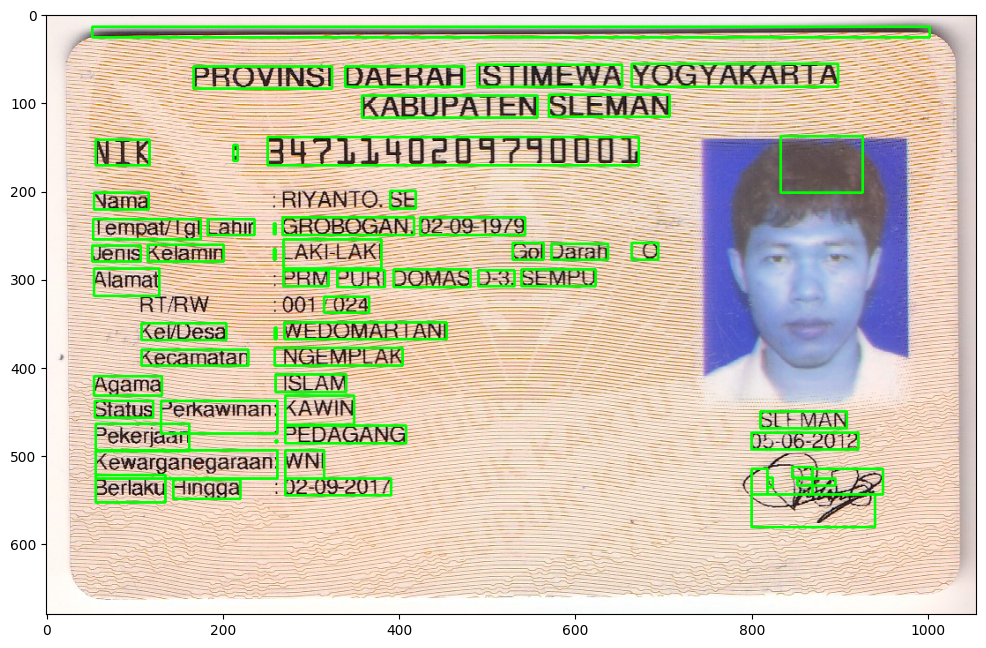

In [13]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 0:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

In [22]:
!apt-get install tesseract-ocr -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [23]:
!apt-get install tesseract-ocr-ind -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 1s (488 kB/s)
Selecting previously unselected package tesseract-ocr-ind.
(Reading database ... 126455 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-ind_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-ind (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-ind (1:4.00~git30-7274cfa-1.1) ...


em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



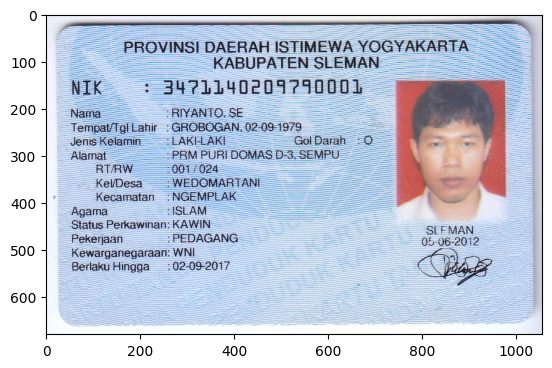

In [25]:
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd

# Baca gambar
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/ktp.png")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()


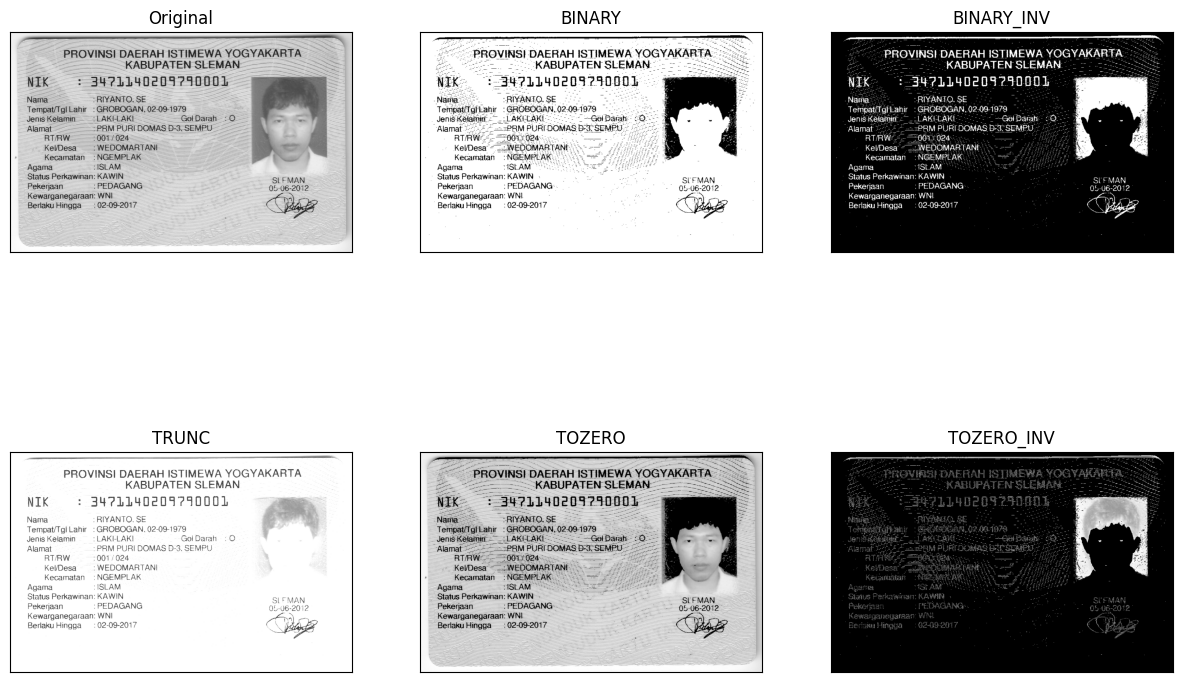

In [26]:
filename = ('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/ktp.png')
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# BINARY
ret1, thresh_binary = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

# BINARY_INV
ret2, thresh_binary_inv = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)

# TRUNC
ret3, thresh_trunc = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)

# TOZERO
ret4, thresh_tozero = cv.threshold(gray, 127, 255, cv.THRESH_TOZERO)

# TOZERO_INV
ret5, thresh_tozero_inv = cv.threshold(gray, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gray, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
import cv2
import pytesseract

# Baca gambar
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/ktp.png')

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Hilangkan noise agar teks lebih tajam
gray = cv2.medianBlur(gray, 3)

# Buat berbagai thresholding
thresh_binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
thresh_binary_inv = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
thresh_trunc = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
thresh_tozero = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
thresh_tozero_inv = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)

print("Teks Hasil Global Thresholding\n")

threshold_types = {
    'BINARY': thresh_binary,
    'BINARY_INV': thresh_binary_inv,
    'TRUNC': thresh_trunc,
    'TOZERO': thresh_tozero,
    'TOZERO_INV': thresh_tozero_inv
}

# Konfigurasi tesseract untuk Bahasa Indonesia
custom_config = r'--oem 3 --psm 6 -l ind'

for name, thresh_img in threshold_types.items():
    print(f"Teks Hasil dengan {name} Thresholding".center(60, "="))
    text = pytesseract.image_to_string(thresh_img, config=custom_config)

    # Bersihkan hasil OCR agar lebih rapi
    lines = [line.strip() for line in text.splitlines() if line.strip()]
    clean_text = "\n".join(lines)

    print(clean_text)
    print("=" * 60 + "\n")


Teks Hasil Global Thresholding

===========Teks Hasil dengan BINARY Thresholding============
Ea
PROVINSI DAERAH ISTIMEWA YOGYAKARTA — ..
KABUPATEN SLEMAN Oa
NIK : 34?2110209?90001
Nama RIYANIO. SE .
Tempat'Tgl Lahir : GROBOGAN. 02 09 1979
Jenis Kelamin “LAKI LAKI Goi Darah : 0 - -
Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001. 024
KelDesa : WEDOMARTANI
Kecamatan - NGEMPLAK
Agama ISLAM
Status Perkawinan: KAWIN Si? MAN
Pekerjaan PEDAGANG GH U6:20”2
Kewarganegaraan: WNI N .
Berlaru Hingga 02-09-2017 “Pos

=========Teks Hasil dengan BINARY_INV Thresholding==========
oa...
PROVINSI DAERAH ISTIMEWA YOGYAKARTA — ..
NO NI Kai Pa
DG : 34?2110209790001
Nu RIYANIO. SE P
Tempat'Tgl Lahir : GROBOGAN. 02 09 1979
Jenis Kelamin PPN B Ea Le ADI NO) P -
PA ETanaNi PRM PURI DOMAS D-3. SEMPU
aksi BN OOM Oya.
KelDesa : WEDOMARTANI
Kecamatan - NGEMPLAK
Pore llkal PAN
Status Perkawinan: KAWIN NN ANN!
Pekerjaan kan erale TAN rap
Kewarganegaraan: WNI N .
Berlaru Hingga 02-09-2017 an

============Teks Hasil dengan

Kesimpulan: Thresholding yang paling mendekati gambar asli adalah THRESH_TRUNC, karena tetap mempertahankan gradasi warna dan detail teks tanpa membuat gambar terlalu hitam-putih.